In [64]:
import pandas
import numpy as np
#df=pandas.read_csv(r"/Users/Apple/Downloads/Housing.csv")
#X=df['area'].to_numpy(dtype=float)
#y=df['price'].to_numpy(dtype=float)
df=pandas.read_csv(r"/Users/Apple/Downloads/salary.csv")
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [65]:
X.shape,y.shape

((30, 1), (30,))

In [66]:
type(X)

numpy.ndarray

In [67]:
#Normalizing X
#diff=max(X)-min(X)
#for i in range(len(X)):
    #X[i]=(X[i]-min(X))/diff
    #y[i]=y[i]/10000


In [68]:
m=y.shape[0]
y=y.reshape(y.shape[0],1)
X[:5], y[:5]

(array([[1.1],
        [1.3],
        [1.5],
        [2. ],
        [2.2]]),
 array([[39343],
        [46205],
        [37731],
        [43525],
        [39891]]))

In [69]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25)

In [70]:
X.shape, y.shape, m

((30, 1), (30, 1), 30)

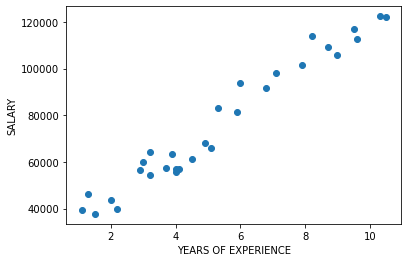

In [71]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel("YEARS OF EXPERIENCE")
plt.ylabel("SALARY")
plt.show()

In [72]:
class Linear_Regression:
    
    theta_0=0
    theta_1=0
    
    def fit(self,X,y,epochs,alpha):
        costs,avg_theta=[],[]
        for j in range(epochs):
            hypothesis=[]
            sum1,sum2,loss=0,0,0
            for i in range(len(X)):
                hypothesis.append(self.theta_0+self.theta_1*X[i])
                sum1+=hypothesis[i]-y[i]
                sum2+=(hypothesis[i]-y[i])*X[i]
                loss+=(hypothesis[i]-y[i])**2
            
            sum1=sum1/len(X)
            sum2=sum2/len(X)
            loss=loss/(2*len(X))
            costs.append(loss)
        
            self.theta_0-=alpha*sum1
            self.theta_1-=alpha*sum2
            avg_theta.append((self.theta_1+self.theta_0)/2)
        
        return [self.theta_0, self.theta_1], costs, avg_theta
    
    def reg_fit(self,X,y,epochs,alpha,lembda):
        costs,avg_theta=[],[]
        for j in range(epochs):
            hypothesis=[]
            sum1,sum2,loss=0,0,0
            for i in range(len(X)):
                hypothesis.append(self.theta_0+self.theta_1*X[i])
                sum1+=hypothesis[i]-y[i]
                sum2+=(hypothesis[i]-y[i])*X[i]
                loss+=(hypothesis[i]-y[i])**2 
            
            sum1=sum1/len(X)
            sum2=sum2/len(X) + lembda*self.theta_1/len(X)
            
            loss+=lembda*(self.theta_0**2 + self.theta_1**2)
            loss=loss/(2*len(X))
            costs.append(loss)
            
            self.theta_0-=alpha*sum1
            self.theta_1-=alpha*sum2
            avg_theta.append((self.theta_1+self.theta_0)/2)
        
        return [self.theta_0, self.theta_1], costs, avg_theta
    
    def predict(self,X):
        pred_y=[]
        for i in X:
            pred_y.append(self.theta_0 + self.theta_1 * i)
        
        return pred_y

In [73]:
model=Linear_Regression()
theta,cost_fun1,avg_theta=model.fit(train_x,train_y,10000,alpha=0.001)
theta

[array([20719.22520757]), array([10208.18919072])]

In [74]:
pred_y=model.predict(test_x)
dict={"Actual": test_y.flatten(), "predicted":pred_y}
df1=pandas.DataFrame(dict)
df1

,Actual,predicted
0,37731,[36031.508993643045]
1,121872,[127905.2117100916]
2,56642,[50322.97386064615]
3,63218,[60531.16305136266]
4,57081,[62572.80088950595]
5,83088,[74822.62791836576]
6,67938,[70739.35224207917]
7,46205,[33989.87115549974]


In [75]:
import math
math.sqrt(cost_fun1[-1])

4164.691072075615

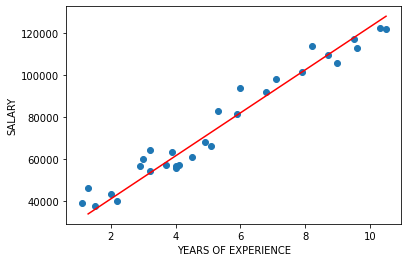

In [76]:
plt.scatter(X, y)
plt.plot([min(test_x), max(test_x)], [min(pred_y), max(pred_y)], color='red')
plt.xlabel("YEARS OF EXPERIENCE")
plt.ylabel("SALARY")
plt.show()

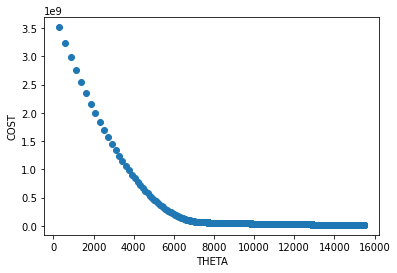

In [77]:
plt.scatter(avg_theta,cost_fun1)
plt.xlabel("THETA")
plt.ylabel("COST")
plt.show()

In [78]:
reg_theta,cost_fun2,avg_theta=model.reg_fit(train_x,train_y,10000,alpha=0.001,lembda=1)

In [79]:
reg_theta

[array([24018.90893989]), array([9723.05386295])]

In [80]:
pred_y=model.predict(test_x)
dict={"Actual": test_y.flatten(), "predicted":pred_y}
df1=pandas.DataFrame(dict)
df1

,Actual,predicted
0,37731,[38603.4897343163]
1,121872,[126110.97450086522]
2,56642,[52215.76514244614]
3,63218,[61938.81900539601]
4,57081,[63883.42977798599]
5,83088,[75551.09441352585]
6,67938,[71661.8728683459]
7,46205,[36658.878961726325]


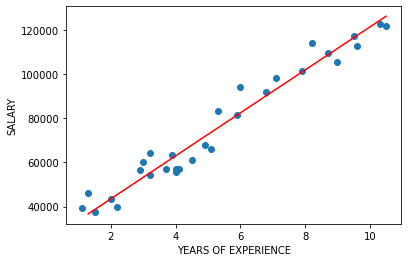

In [81]:
plt.scatter(X, y)
plt.plot([min(test_x), max(test_x)], [min(pred_y), max(pred_y)], color='red')
plt.xlabel("YEARS OF EXPERIENCE")
plt.ylabel("SALARY")
plt.show()

In [82]:
import math
math.sqrt(cost_fun2[-1])

4018.889539507987